<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumCircuit_QuantumOracle_00_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=69d58c4d806242a40dddf2a2813445856c017a93c23b1304202f548f44f4a838
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.7 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [3]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from numpy import pi

In [2]:
# Oracle (숨김 함수) 구현
def hidden_function_oracle(secret_string):
    """숨김 함수 Oracle 생성."""
    n = len(secret_string)
    oracle_qc = QuantumCircuit(n + 1, name = "Hidden_fuction_Oracle") # n개의 입력 큐비트와 1개의 출력 큐비트

    # secret_string에 따라 CNOT 게이트 적용
    for i, bit in enumerate(secret_string):
        if bit == '1':
            oracle_qc.cx(i, n) # i번째 큐비트를 제어 큐비트로, n번째 큐비트를 타겟 큐비트로 하는 CNOT 게이트
        ###if
    ###for
    return oracle_qc
###def


# Deutsch-Jozsa 알고리즘 회로 구성
def deutsch_jozsa_algorithm(secret_string):
    """Deutsch-Jozsa 알고리즘 회로 생성."""
    n = len(secret_string)
    dj_qc = QuantumCircuit(n + 1, n, name="Deutsch-Jozza") # n개의 입력 큐비트와 1개의 출력 큐비트, n개의 측정 큐비트

    # 초기 상태 준비
    dj_qc.x(n)  # 출력 큐비트 (|1⟩ 상태로 초기화)
    dj_qc.h(n)  # 출력 큐비트에 Hadamard 게이트 적용

    for i in range(n):
        dj_qc.h(i)  # 모든 입력 큐비트에 Hadamard 게이트 적용
    ###for

    # Oracle 추가
    oracle = hidden_function_oracle(secret_string)
    dj_qc.append(oracle, range(n + 1))  # Oracle을 회로에 추가

    # Hadamard 게이트 다시 적용
    for i in range(n):
        dj_qc.h(i)
    ###for

    # 측정
    for i in range(n):
        dj_qc.measure(i, i)  # 모든 입력 큐비트 측정
    ###for

    return dj_qc
###def

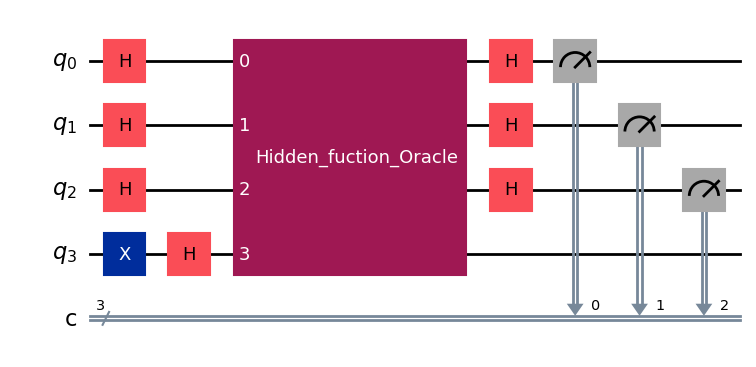

In [5]:
# 실행
secret_string = '101' # 숨겨진 문자열 (함수 정의)
dj_circuit = deutsch_jozsa_algorithm(secret_string)
dj_circuit.draw("mpl")

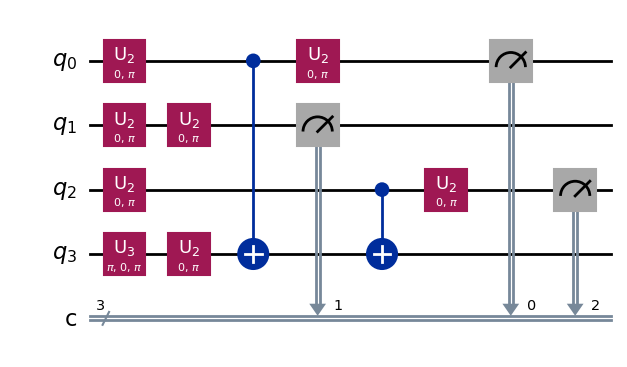

In [6]:
dj_circuit.decompose().draw("mpl")

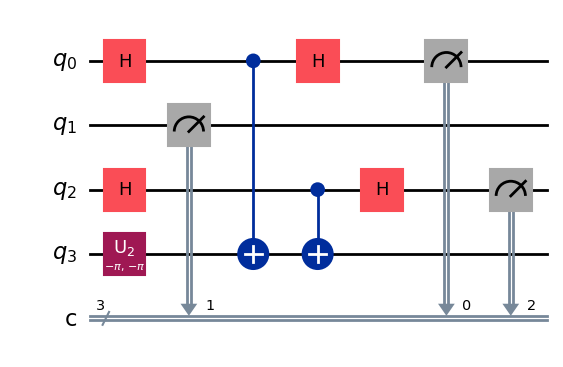

In [7]:
# 시뮬레이션
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(dj_circuit, simulator)
compiled_circuit.draw("mpl")


측정 결과: {'101': 1024}


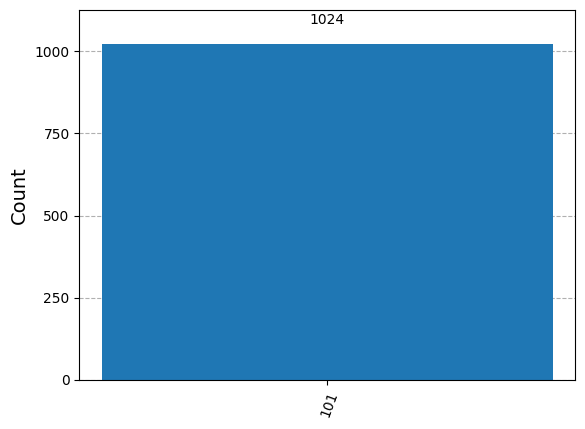

In [8]:
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(dj_circuit)
print("\n측정 결과:", counts)
plot_histogram(counts)

In [ ]:
def main():
    secret_string = '101' # 숨겨진 문자열 (함수 정의)
    dj_circuit = deutsch_jozsa_algorithm(secret_string)
    # 검증 회로 실행 (원본 상태와 텔레포트된 상태가 같은지 확인)
    # 시뮬레이션
    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(dj_circuit, simulator)
    #compiled_circuit.draw("mpl")
    counts = result.get_counts(dj_circuit)
    print("\n측정 결과:", counts)
    #plot_histogram(counts)
###def

In [ ]:
# 메인 예제 코드
if __name__ == "__main__":
    main()


측정 결과: {'101': 1024}
